In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm.auto import tqdm

sns.set()
plt.rcParams['svg.fonttype'] = 'none'

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
DATA_DIR = Path("../../data/physionet2012/orig_data/set-a")
FIGS_PATH = Path("figures/eda-physionet2012/")

In [9]:
dfs = []

for f in tqdm(DATA_DIR.iterdir()):
    dfs.append(
        pd.read_csv(f, header=0).drop(0, axis=0).assign(RecordID=int(f.stem))
    )

df = (
    pd.concat(dfs, ignore_index=True, axis=0)
    .drop_duplicates(subset=["Time", "Parameter", "RecordID"], keep="last")
    .pivot(columns="Parameter", index=["RecordID", "Time"], values="Value")
    .reset_index()
)
hm = df.Time.str.split(":", n=2, expand=True).astype(int)
df.Time = hm[0] + hm[1] / 60

4000it [00:12, 313.18it/s]


In [10]:
CAT_FEATURES = ["Gender", "ICUType", "MechVent"]

In [11]:
df

Parameter,RecordID,Time,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,132539,0.000000,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN
1,132539,0.116667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,NaN,NaN,35.1,NaN,NaN,900.0,NaN,NaN,NaN
2,132539,0.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,NaN,NaN,35.6,NaN,NaN,60.0,NaN,NaN,NaN
3,132539,1.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN
4,132539,2.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299259,142673,45.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,112.0,NaN,NaN,NaN,23.0,NaN,87.3,NaN
299260,142673,45.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.31
299261,142673,46.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,121.0,37.3,NaN,NaN,40.0,NaN,87.3,NaN
299262,142673,47.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,127.0,NaN,NaN,NaN,NaN,NaN,87.3,NaN


# Categorical features 

In [33]:
for c in CAT_FEATURES:
    print(f"{c}: {df[c].unique()}")

Gender: [ 0. nan  1. -1.]
ICUType: [ 4. nan  2.  3.  1.]
MechVent: [nan  1.]


# Time distributrion 

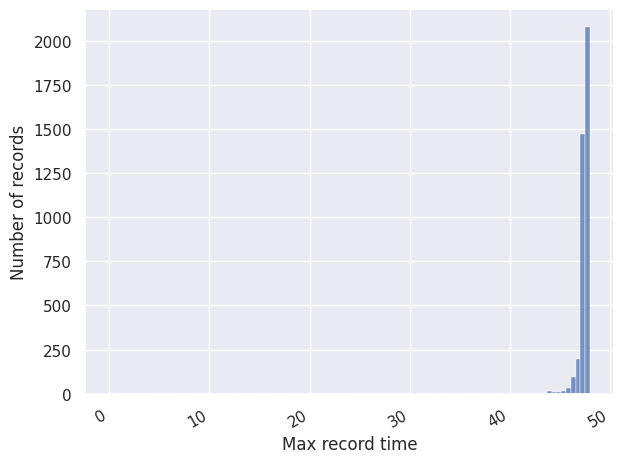

In [40]:
max_time = df.groupby("RecordID")["Time"].max()

fig, ax = plt.subplots(layout="tight")

sns.histplot(max_time, bins=100, ax=ax)

ax.set_xlabel("Max record time")
ax.set_ylabel("Number of records")
fig.autofmt_xdate()

fig.savefig(FIGS_PATH / "rec_max_time_hist.svg")

In [41]:
max_time.max()

48.0

# All features

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter,,,,,,,,
RecordID,299264.0,137611.362259,2918.552296,132539.00,135086.000000,137624.00,140104.00,142673.00
Time,299264.0,21.588369,14.222764,0.00,8.683333,20.50,33.80,48.00
ALP,3090.0,116.753722,133.946312,12.00,59.000000,82.00,122.00,2205.00
ALT,3175.0,394.613228,1200.529064,1.00,20.000000,43.00,162.00,11470.00
AST,3180.0,506.541195,1516.870860,4.00,31.000000,64.00,209.00,18430.00
Age,4000.0,64.247500,17.560946,15.00,52.750000,67.00,78.00,90.00
Albumin,2355.0,2.922166,0.651638,1.00,2.500000,2.90,3.40,5.30
BUN,13907.0,27.415647,23.399119,0.00,13.000000,20.00,33.00,197.00
Bilirubin,3190.0,2.909373,5.905653,0.10,0.500000,0.90,2.30,47.70
